In [45]:
import requests
from bs4 import BeautifulSoup
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import seaborn as sns
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


import statsmodels.api as sm
import patsy as pt
import sklearn.linear_model as lm

In [2]:
url = 'https://www.tiobe.com/tiobe-index/'

content = requests.get(url)

soup = BeautifulSoup(content.text,"lxml")

tables = soup.find_all("table")

df_tb=pd.read_html(str(tables[0]), header = 0)[0]

Text(0.5,1,'Jun 2019 - Programming Popularity (TIOBE index)')

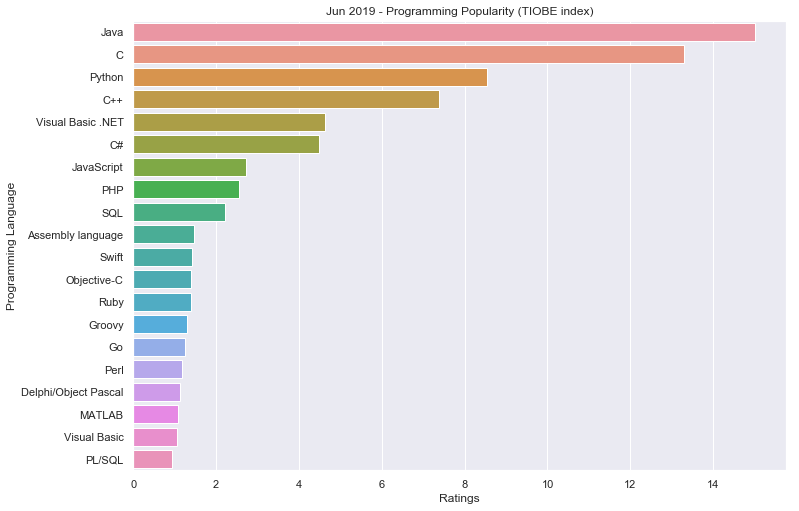

In [3]:
sns.set(style = "whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
df_tb['Ratings'] = df_tb.loc[:,'Ratings'].apply(lambda x: float(x.strip("%")))
df_tb['Change.1'] = df_tb.loc[:,'Change.1'].apply(lambda x: float(x.strip("%")))
sns.barplot('Ratings', 'Programming Language', data = df_tb).set_title('Jun 2019 - Programming Popularity (TIOBE index)')

In [4]:
df_2017=pd.read_excel('top_proglang_2017.xlsx')
df_2018=pd.read_excel('top_proglang_2018.xlsx')
df_2019=pd.read_excel('top_proglang_2019.xlsx')

In [5]:
df_2017.drop(['Rank', 'Trend'], inplace=True, axis=1)
df_2017.set_index('Language', inplace=True)
df_2017.rename(columns={'Share':'2017'}, inplace=True)
df_2017.head()

,2017
Language,
Java,0.227
Python,0.161
PHP,0.093
C#,0.082
Javascript,0.079


In [6]:
df_2018.drop(['To be adopted/migrated to soon'], inplace=True, axis=1)
df_2018.set_index('Language', inplace=True)
df_2018.rename(columns={'Used regularly':'2018'}, inplace=True)
df_2018.head()

,2018
Language,
Javascript,0.64
HTML / CSS,0.55
Java,0.51
SQL,0.47
Python,0.41


In [7]:
df_2019.drop(['Rank', 'Trend'], inplace=True, axis=1)
df_2019.set_index('Language', inplace=True)
df_2019.rename(columns={'Share':'2019'}, inplace=True)
df_2019.head()

,2019
Language,
Python,28.08 %
Java,20.51 %
Javascript,8.29 %
C#,7.41 %
PHP,6.96 %


In [8]:
df_2017.index = np.array([x.lower() if isinstance(x, str) else x for x in df_2017.index])
df_2018.index = np.array([x.lower() if isinstance(x, str) else x for x in df_2018.index])
df_2019.index = np.array([x.lower() if isinstance(x, str) else x for x in df_2019.index])

In [9]:
df_2019=df_2019.replace('\%','',regex=True).astype(float)

In [10]:
df_2017['2017']=df_2017['2017']*100
df_2017['2017'].sum()

100.0

In [11]:
df_2018['2018']=df_2018['2018']*100/df_2018['2018'].sum()
df_2018['2018'].sum()

100.00000000000006

In [12]:
df_2017.index.name='Language'
df_2018.index.name='Language'
df_2019.index.name='Language'

In [13]:
df=pd.merge(df_2017, df_2018, on='Language', how='outer')
df

,2017,2018
Language,,
java,22.7,11.358575
python,16.1,9.131403
php,9.3,5.790646
c#,8.2,4.899777
javascript,7.9,14.253898
c++,6.8,4.008909
c,6.6,3.563474
objective-c,3.7,1.113586
r,3.6,0.668151


In [14]:
df=pd.merge(df, df_2019, on='Language', how='outer')
df

,2017,2018,2019
Language,,,
java,22.7,11.358575,20.51
python,16.1,9.131403,28.08
php,9.3,5.790646,6.96
c#,8.2,4.899777,7.41
javascript,7.9,14.253898,8.29
c++,6.8,4.008909,5.76
c,6.6,3.563474,5.76
objective-c,3.7,1.113586,2.82
r,3.6,0.668151,4.15


In [15]:
df_2016=pd.read_csv('top_proglang_2016.csv')

In [16]:
proglang=np.array(df.index)
proglang = np.array([x.lower() if isinstance(x, str) else x for x in proglang])
proglang

array(['java', 'python', 'php', 'c#', 'javascript', 'c++', 'c',
       'objective-c', 'r', 'swift', 'matlab', 'ruby', 'visual basic',
       'visual basic .net', 'typescript', 'scala', 'perl', 'go', 'lua',
       'delphi', 'rust', 'haskell', 'html / css', 'sql',
       'shell scripting languages', 'kotlin', 'groovy', 'elixir',
       'assembly language', 'julia'], dtype='<U25')

In [17]:
rows=[]
for ind in df_2016.columns:
    bol=True
    for x in proglang:
        if ind == x:
            bol=False
            break
    if bol:
        rows.append(ind)
            
df_2016.drop(rows, inplace=True, axis=1)
df_2016.head()

,c,c#,c++,elixir,go,haskell,java,javascript,kotlin,lua,...,objective-c,perl,php,python,ruby,rust,scala,swift,typescript,sql
0,0.0,0.0000,0.00000,0.0,0.005747,0.000000,0.015326,0.049808,0.0,0.0,...,0.000000,0.000000,0.0,0.010536,0.216475,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0171,0.00000,0.0,0.000000,0.000000,0.000000,0.327881,0.0,0.0,...,0.000000,0.000000,0.0,0.028996,0.000000,0.0,0.0,0.0,0.015613,0.0
2,0.0,0.0000,0.00000,0.0,0.000000,0.000000,0.000000,0.011375,0.0,0.0,...,0.025853,0.003102,0.0,0.185109,0.007239,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0000,0.00000,0.0,0.000000,0.266355,0.018692,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.004673,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0000,0.10231,0.0,0.000000,0.000000,0.000000,0.268152,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [18]:
df_2016=pd.DataFrame(df_2016.std())
df_2016.head()

,0
c,0.038098
c#,0.040868
c++,0.041504
elixir,0.024312
go,0.043427


In [19]:
df_2016.rename(columns={0:'2016'}, inplace=True)
df_2016.head()

,2016
c,0.038098
c#,0.040868
c++,0.041504
elixir,0.024312
go,0.043427


In [20]:
df_2016.index.name='Language'
df_2016['2016']=df_2016['2016']*100/df_2016['2016'].sum()

In [21]:
df=pd.merge(df_2016, df, on='Language', how='outer')
df

,2016,2017,2018,2019
Language,,,,
c,4.402403,6.6,3.563474,5.76
c#,4.722501,8.2,4.899777,7.41
c++,4.796021,6.8,4.008909,5.76
elixir,2.809345,NaN,0.445434,NaN
go,5.018199,0.5,2.672606,1.19
haskell,2.474109,0.3,NaN,0.32
java,8.842553,22.7,11.358575,20.51
javascript,14.175602,7.9,14.253898,8.29
kotlin,1.696668,NaN,2.004454,1.40


In [22]:
df_tb.head()

,Jun 2019,Jun 2018,Change,Programming Language,Ratings,Change.1
0,1,1,NaN,Java,15.004,-0.36
1,2,2,NaN,C,13.300,-1.64
2,3,4,NaN,Python,8.530,2.77
3,4,3,NaN,C++,7.384,-0.95
4,5,6,NaN,Visual Basic .NET,4.624,0.86


In [23]:
df_tb.drop(['Jun 2019', 'Jun 2018', 'Change.1', 'Change'], inplace=True, axis=1)
df_tb.rename(columns={'Programming Language':'Language', 'Ratings':'2019_1'}, inplace=True)
df_tb.set_index('Language', inplace=True)
df_tb.head()

,2019_1
Language,
Java,15.004
C,13.300
Python,8.530
C++,7.384
Visual Basic .NET,4.624


In [24]:
df_tb['2019_1']=df_tb['2019_1']*100/df_tb['2019_1'].sum()
df_tb['2019_1'].sum()

100.0

In [25]:
df_tb.index = np.array([x.lower() if isinstance(x, str) else x for x in df_tb.index])

In [26]:
df_tb.index.name='Language'

In [27]:
df=pd.merge(df, df_tb, on='Language', how='outer')
df

,2016,2017,2018,2019,2019_1
Language,,,,,
c,4.402403,6.6,3.563474,5.76,17.866018
c#,4.722501,8.2,4.899777,7.41,6.022057
c++,4.796021,6.8,4.008909,5.76,9.918998
elixir,2.809345,NaN,0.445434,NaN,NaN
go,5.018199,0.5,2.672606,1.19,1.688540
haskell,2.474109,0.3,NaN,0.32,NaN
java,8.842553,22.7,11.358575,20.51,20.155018
javascript,14.175602,7.9,14.253898,8.29,3.648429
kotlin,1.696668,NaN,2.004454,1.40,NaN


In [37]:
df_trans=df.T
df_trans

Language,c,c#,c++,elixir,go,haskell,java,javascript,kotlin,lua,...,visual basic,visual basic .net,delphi,html / css,shell scripting languages,groovy,assembly language,julia,delphi/object pascal,pl/sql
2016,4.402403,4.722501,4.796021,2.809345,5.018199,2.474109,8.842553,14.175602,1.696668,2.232426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,6.600000,8.200000,6.800000,NaN,0.500000,0.300000,22.700000,7.900000,NaN,0.400000,...,1.400000,1.400000,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,3.563474,4.899777,4.008909,0.445434,2.672606,NaN,11.358575,14.253898,2.004454,0.668151,...,NaN,NaN,NaN,12.249443,6.458797,0.890869,0.445434,NaN,NaN,NaN
2019,5.760000,7.410000,5.760000,NaN,1.190000,0.320000,20.510000,8.290000,1.400000,0.370000,...,1.330000,1.090000,0.31,NaN,NaN,NaN,NaN,0.32,NaN,NaN
2019_1,17.866018,6.022057,9.918998,NaN,1.688540,NaN,20.155018,3.648429,NaN,NaN,...,1.435998,6.211464,NaN,NaN,NaN,1.746303,1.986755,NaN,1.516597,1.247935


In [109]:
df['2020']=0
df

,2016,2017,2018,2019,2019_1,2020
Language,,,,,,
c,4.402403,6.6,3.563474,5.76,17.866018,0
c#,4.722501,8.2,4.899777,7.41,6.022057,0
c++,4.796021,6.8,4.008909,5.76,9.918998,0
elixir,2.809345,0.0,0.445434,0.00,0.000000,0
go,5.018199,0.5,2.672606,1.19,1.688540,0
haskell,2.474109,0.3,0.000000,0.32,0.000000,0
java,8.842553,22.7,11.358575,20.51,20.155018,0
javascript,14.175602,7.9,14.253898,8.29,3.648429,0
kotlin,1.696668,0.0,2.004454,1.40,0.000000,0


In [101]:
df.fillna(0, inplace=True)

In [116]:
x = df[['2016', '2017', '2018', '2019']].values
y = df['2019_1'].values

skm = lm.LinearRegression()
# запускаем расчет параметров для указанных данных
skm.fit(x, y)
# и выведем параметры рассчитанной модели

df['2020']=skm.predict(x)
df

,2016,2017,2018,2019,2019_1,2020
Language,,,,,,
c,4.402403,6.6,3.563474,5.76,17.866018,6.286905
c#,4.722501,8.2,4.899777,7.41,6.022057,7.680183
c++,4.796021,6.8,4.008909,5.76,9.918998,6.414174
elixir,2.809345,0.0,0.445434,0.00,0.000000,0.350579
go,5.018199,0.5,2.672606,1.19,1.688540,0.138248
haskell,2.474109,0.3,0.000000,0.32,0.000000,0.714515
java,8.842553,22.7,11.358575,20.51,20.155018,20.503815
javascript,14.175602,7.9,14.253898,8.29,3.648429,4.821507
kotlin,1.696668,0.0,2.004454,1.40,0.000000,0.302696


In [119]:
df['2021']=0
x = df[['2016', '2017']].values
y = df['2019_1'].values

skm = lm.LinearRegression()
# запускаем расчет параметров для указанных данных
skm.fit(x, y)
# и выведем параметры рассчитанной модели

df['2021']=skm.predict(x)
df

,2016,2017,2018,2019,2019_1,2020,2021
Language,,,,,,,
c,4.402403,6.6,3.563474,5.76,17.866018,6.286905,6.009133
c#,4.722501,8.2,4.899777,7.41,6.022057,7.680183,7.404091
c++,4.796021,6.8,4.008909,5.76,9.918998,6.414174,6.095106
elixir,2.809345,0.0,0.445434,0.00,0.000000,0.350579,0.323093
go,5.018199,0.5,2.672606,1.19,1.688540,0.138248,0.231836
haskell,2.474109,0.3,0.000000,0.32,0.000000,0.714515,0.683456
java,8.842553,22.7,11.358575,20.51,20.155018,20.503815,19.741120
javascript,14.175602,7.9,14.253898,8.29,3.648429,4.821507,4.764369
kotlin,1.696668,0.0,2.004454,1.40,0.000000,0.302696,0.601249
